In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

In [119]:
data = pd.read_csv('housing.csv')

In [120]:
data.dropna(inplace=True)

In [121]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'],axis=1)
y = data['median_house_value']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [123]:
train_data = X_train.join(y_train) # type: ignore

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

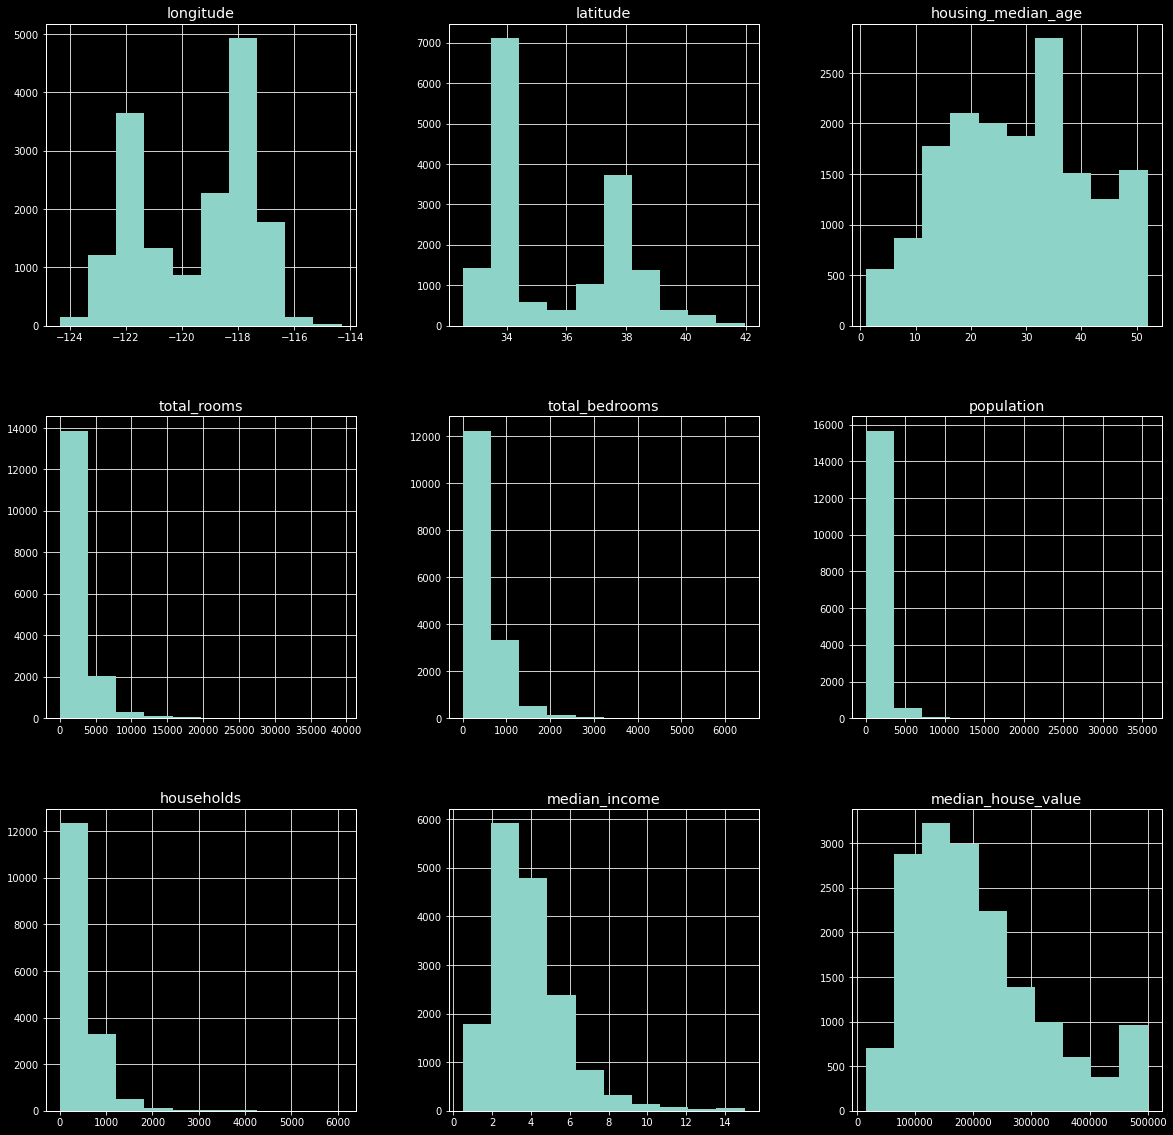

In [124]:
train_data.hist(figsize=(20,20))


<AxesSubplot:>

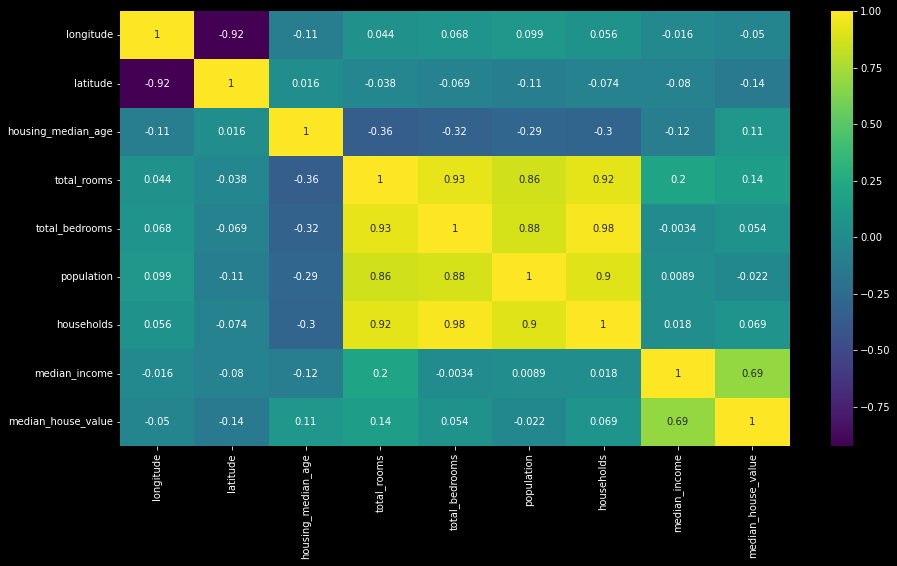

In [125]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='viridis')

In [126]:
train_data['total_rooms'] =np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] =np.log(train_data['total_bedrooms'] + 1)
train_data['population'] =np.log(train_data['population'] + 1)
train_data['households'] =np.log(train_data['households'] + 1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

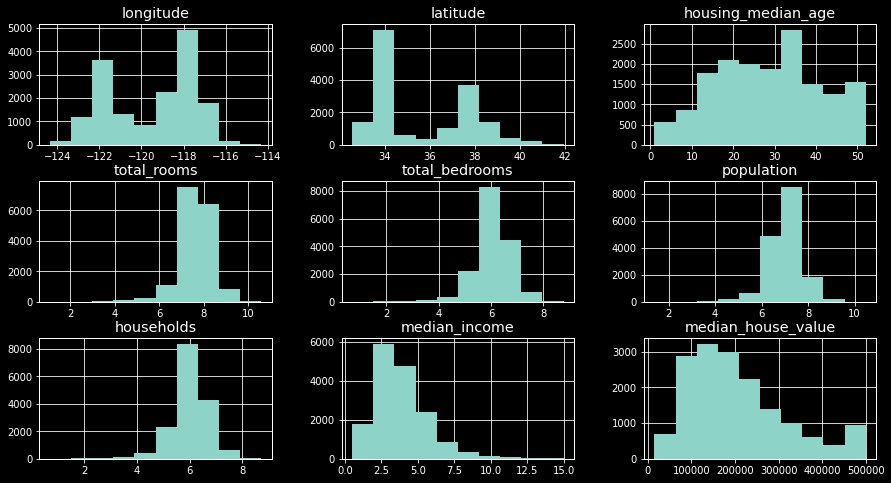

In [127]:
train_data.hist(figsize=(15,8))

In [131]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop('ocean_proximity',axis=1)

<AxesSubplot:>

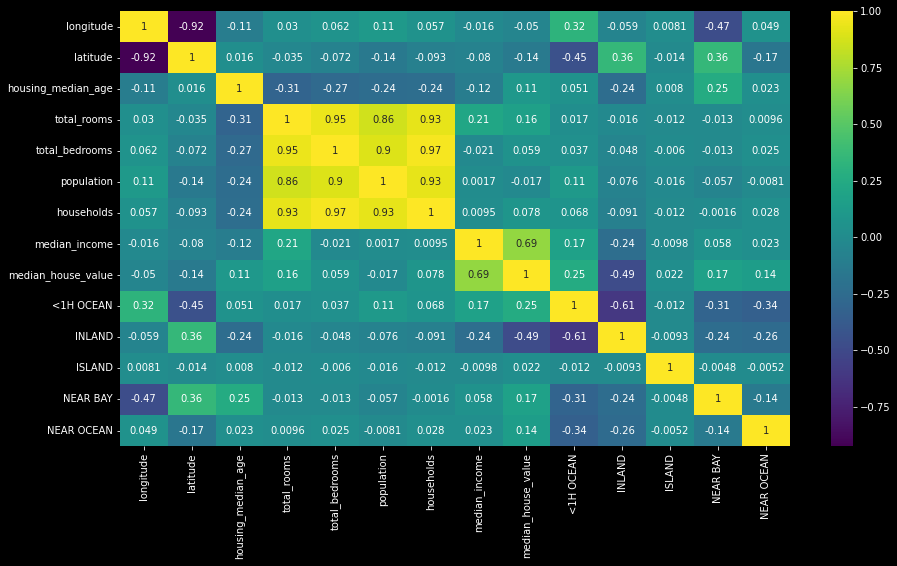

In [132]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='viridis')

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

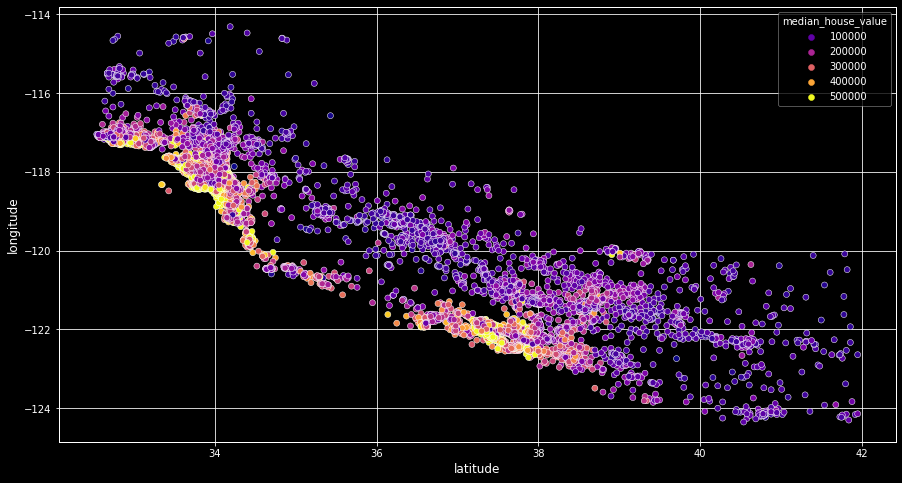

In [135]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value',palette='plasma')

In [136]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']


<AxesSubplot:>

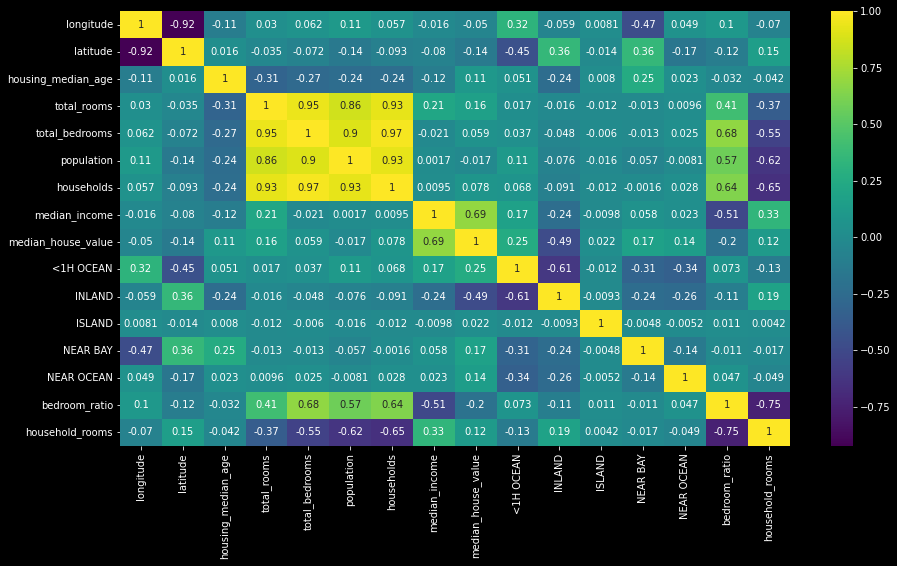

In [137]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='viridis')
